In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# setting path
path = r'C:\Users\Javier\Documents\Master Folder'

In [3]:
# importing data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_merged_data_task.pkl'))

In [4]:
#check the output
df.shape

(32404859, 35)

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

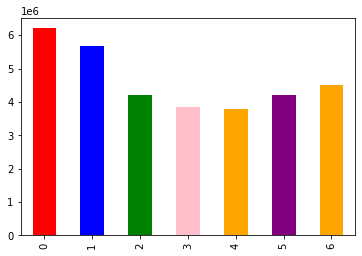

In [6]:
# bar chart
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'pink', 'orange', 'purple', 'orange'])

<AxesSubplot:ylabel='Frequency'>

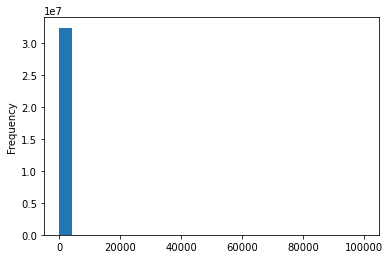

In [7]:
# histogram
df['prices'].plot.hist(bins = 25)

In [8]:
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [9]:
df.loc[df['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
7805,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,Frequent Customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,Frequent Customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,Frequent Customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,prior,27,2,19,8.0,33664,2,0,...,Frequent Customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,Frequent Customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [10]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [11]:
df['prices'].max()

25.0

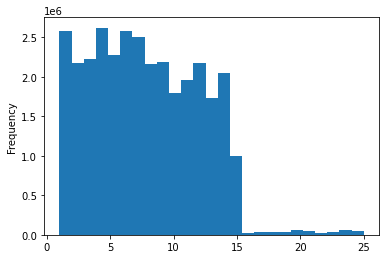

In [12]:
hist = df['prices'].plot.hist(bins = 25)

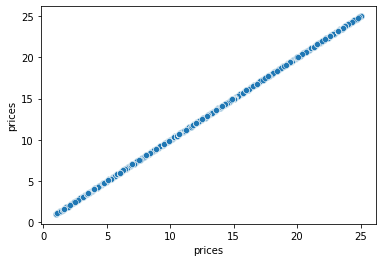

In [13]:
# Creating scatterplot
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [14]:
# define the sub set of the df for the line chart (plotting the top 1 million)
# creating a random sampling
np.random.seed(4)

In [15]:
dev = np.random.rand(len(df)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
#splitting the dataframe (70% of the sample in the dataframe)
big = df[dev]

In [18]:
#splitting the dataframe (30% of the sample in the dataframe)
small = df[~dev]

In [19]:
#checking for accuraccy
len(df)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
# select the columns needed line plot
df_2 = small[['orders_day_of_week', 'prices']]

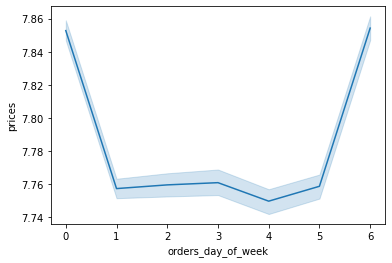

In [22]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# provide the instacart senior stakeholders with findings about sales. Create a histogram of the “order_hour_of_day” column.

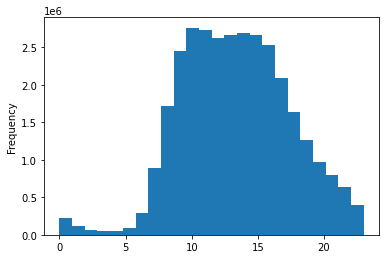

In [23]:
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

The histogram represents the hours of day ranging from 0-23 because 0 counts as 1. This represents the total number of orders placed for each hour.


In [24]:
#checking the histogram accuracy
df['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

# loyalty flag column

<AxesSubplot:>

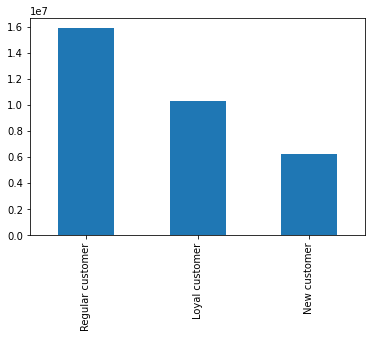

In [25]:
df['loyalty_flag'].value_counts().plot.bar()

Our largest and most consistent customers are just regular customers.

In [26]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [27]:
df_small_2 = small[['order_hour_of_day','prices']]

In [28]:
df_small_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


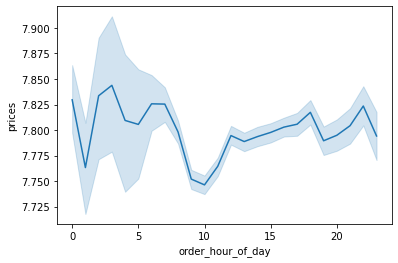

In [29]:
# line chart with 30% of the sample
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day', y = 'prices')

Customers in the data seem to spend more money in the early mornings. We can see that throughout the later hours of the day we see more orders but customers spending less money so in the morning customers are purchasing higher value items. 

In [30]:
# First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [31]:
df_small_3 = small[['age', 'no_of_dependants']]

In [32]:
df_small_3

,age,no_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


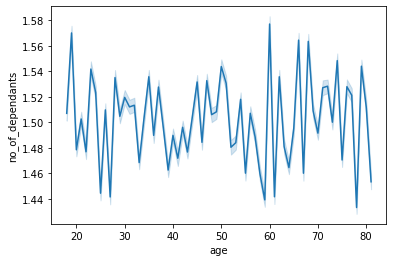

In [33]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'no_of_dependants')

In [34]:
df_small_3['no_of_dependants'].describe()

count    9.721098e+06
mean     1.502105e+00
std      1.118703e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependants, dtype: float64

In [35]:
There is no connection between age and number of dependants for customers using instacart.

SyntaxError: invalid syntax (2847279670.py, line 1)

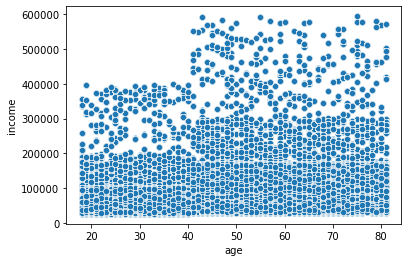

In [37]:
# You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
scatter_2 = sns.scatterplot(x = 'age',y = 'income', data = df)

The scatterplot does show a relationship between age and spending power. Majority of customers between 20 and 40 years of age have a majority income of up to 200k but also a high end income of up to 400k. Customers 40 and up show an average income of between 200k-300k but also sky rockets to a high of 600k.This means the spending power is higher within customers that are 40 plus years of age but there are also some customers that are 40 and under that have more money to spend than the customers that are 40 years and older

# exporting images to the correct folder

In [39]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [40]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_exp.png'))

In [42]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'exp_hour_of_day.png'))

In [44]:
scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [46]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

In [48]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [49]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [50]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_no_of_dependants.png'))

In [51]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))